<a href="https://colab.research.google.com/github/vaquejano/robo_V1UEM/blob/main/Detec%C3%A7%C3%A3o_cor_amarela_e_branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bibliotecas

import cv2 as cv
from google.colab import files
import numpy as np #biblioteca para contas matematicas
import matplotlib.pyplot as plt #biblioteca para exibir a imagem no colab pois foi desabilitado o opencv


In [ ]:
#carrega imagemsegue_faixa.jpg

upload = files.upload()


Saving Mascara amarelo.png to Mascara amarelo.png


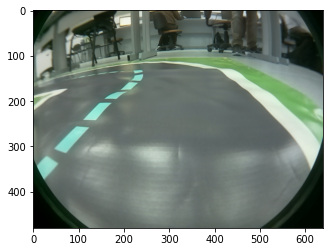

In [ ]:
#preparação da imagem
imagem = (r"Mascara amarelo.png") 
img_cv = cv.imread(imagem) 
plt.imshow(img_cv) 

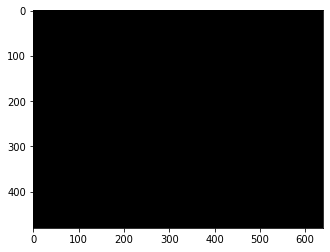

In [ ]:
mask = np.zeros_like(img_cv)
h = 480
w = 640
plt.imshow(mask)


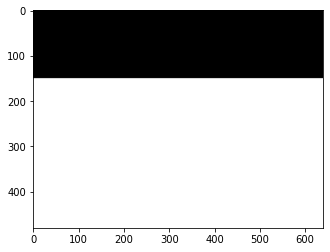

In [ ]:
#Gerar a Mascara - o trapezio amarelo
pts = np.array([[0,480],[0,150],[680,150],[680,480]], dtype=np.int32) # P1, P2, P3, P4
mask_fillpoly = mask #preencher o poligono
masked_filled = cv.fillPoly(mask_fillpoly, [pts], (255, 255, 255)) #pega a mascara, os pontos e preenche de amarelo
plt.imshow(masked_filled, cmap = 'gray')

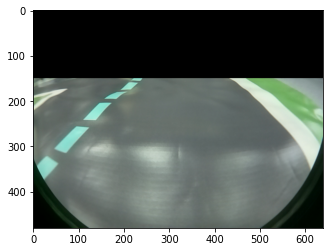

In [ ]:
masked_image = cv.bitwise_and(img_cv, masked_filled)
plt.imshow(masked_image)

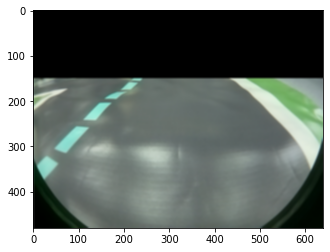

In [ ]:
#img_blur = cv.blur(masked_image, (5, 5))
#plt.imshow(img_blur)

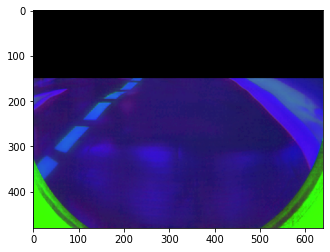

In [ ]:
#preparação da imagem
#imagem = (r"masked_image") 
#imagem = cv.imread(imagem)
#plt.imshow(imagem)
img_hsv = cv.cvtColor(masked_image, cv.COLOR_BGR2HSV) 
plt.imshow(img_hsv) 

9
345
222
158


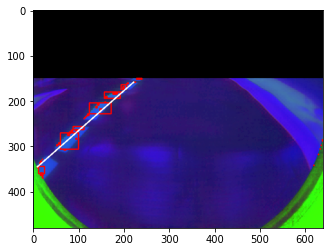

In [ ]:

img_amarelo = img_hsv
low = np.array([25, 90, 90])
high = np.array([36, 255, 255])
mask = cv.inRange(img_amarelo, low, high)
res = cv.bitwise_and(img_amarelo,img_amarelo, mask= mask)

contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x:cv.contourArea(x), reverse=True)
menor_x = 600
menor_y = 0

maior_x = 0
maior_y = 400

for cnt in contours:
  (x, y, w, h) = cv.boundingRect(cnt)
  cv.rectangle(img_amarelo, (x, y), (x+w, y+h), (255,0, 0), 2)
  if menor_x > x:
     menor_x = x
     menor_y = y

  if menor_y > y:
     maior_x = x
     maior_y = y

print(menor_x)
print(menor_y)
print(maior_x)
print(maior_y)
cv.line(img_amarelo, (menor_x,menor_y), (maior_x, maior_y), (255,255,255), 2)
cv.line(img_rgb, (menor_x,menor_y), (maior_x, maior_y), (255,255,255), 2)  

plt.imshow(img_amarelo)

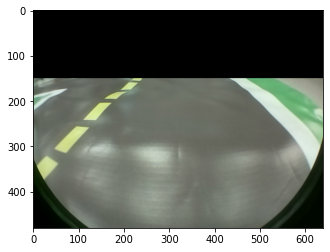

In [ ]:
img_rgb = cv.cvtColor(masked_image, cv.COLOR_BGR2RGB) 
plt.imshow(img_rgb) 

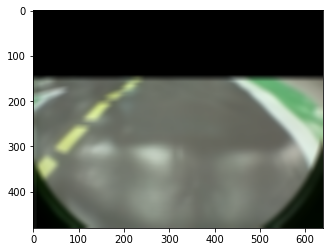

In [ ]:
img_branca = cv.blur(img_rgb, (15, 15))
plt.imshow(img_branca)

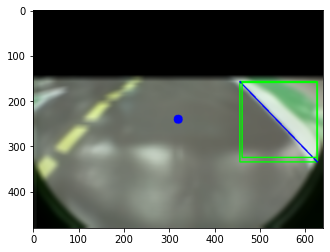

In [ ]:
low = np.array([200, 200, 200])
high = np.array([240, 240, 240])
mask = cv.inRange(img_branca, low, high)
res = cv.bitwise_and(img_branca,img_branca, mask= mask)

contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x:cv.contourArea(x), reverse=True)

for cnt in contours:
  (x, y, w, h) = cv.boundingRect(cnt)
  cv.rectangle(img_branca, (x, y), (x+w, y+h), (0,255, 0), 2)
  break

plt.imshow(img_branca)

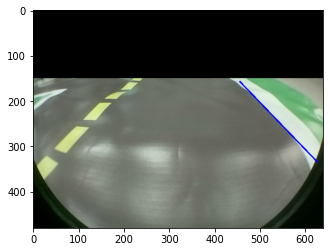

In [ ]:
#Coordenadas Ponto Fixo
#print('Tamanho de Imagem: ', img.shape)
x_medio = 320
y_medio = 240

cv.circle (img_branca,(int(x_medio),int(y_medio)), 10, (0,0,255), -1)
cv.line(img_branca,(x,y),(x+w, y+h), (0,0,255), 2)
cv.line(img_rgb,(x,y),(x+w, y+h), (0,0,255), 2)
plt.imshow(img_rgb)